## Visualizing Cosine Similarity Scores

In [1]:
import os
import pandas as pd
import json
directory = r"C:\Users\ashle\OneDrive\School\CS315_Project2\CS315Project2-main\cosine_data"


def combine_csv(directory):
    all_data = pd.DataFrame()  
    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            print(f'Rows in df file: {len(df)}')
            all_data = pd.concat([all_data, df], ignore_index=True)
    
    print(f'Final Number of rows: {len(all_data)}')
    return all_data

all_csv = combine_csv(directory)


Rows in df file: 1315
Rows in df file: 1242
Rows in df file: 426
Rows in df file: 1434
Rows in df file: 1130
Rows in df file: 6474
Rows in df file: 330
Final Number of rows: 12351


In [56]:
#all_csv.drop(columns=['headline_genre'], inplace=True)
all_csv.head()
unique_values = all_csv['headline_type'].unique()
print(unique_values)

['OpEd' 'Styles' 'Science' 'Business' 'Arts&Leisure' 'Smarter Living' nan
 'Metropolitan' 'Weekend' 'Foreign' 'Culture' 'Washington' 'Summary'
 'BookReview' 'Express' 'Politics' 'National' 'NYTNow' 'SundayBusiness'
 'Climate' 'Travel' 'Insider' 'Metro' 'RealEstate' 'Learning' 'Dining'
 'Editorial' 'Games' 'Headway' 'TStyle' 'Obits' 'Podcasts' 'Magazine'
 'Health' 'Well' 'Briefing' 'Books' 'Real Estate' 'Letters' 'Arts' 'Food'
 'The Upshot' 'Projects and Initiatives' 'Opinion' 'SpecialSections'
 'U.S.' 'Movies' 'Investigative' 'Sports' 'The Learning Network' 'World'
 'Business Day' 'Local Investigations' 'Upshot' 'Style' 'Weather' 'Video'
 'T Magazine' 'en Español' 'Corrections' 'Universal' 'Graphics'
 'Technology' 'Crosswords & Games' 'New York' 'Photo']


c:\Users\ashle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


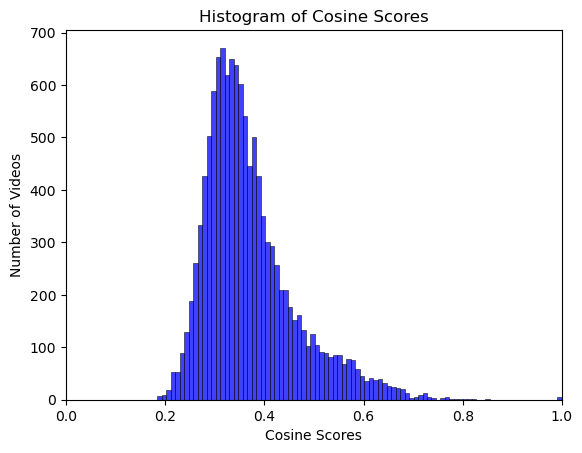

In [15]:
import seaborn as sns

sns.histplot(data=all_csv, x='cos_score', kde=False, color='blue', edgecolor='black')
plt.xlabel('Cosine Scores')
plt.ylabel('Number of Videos')
plt.title('Histogram of Cosine Scores')
plt.xlim(0, 1)
plt.show()

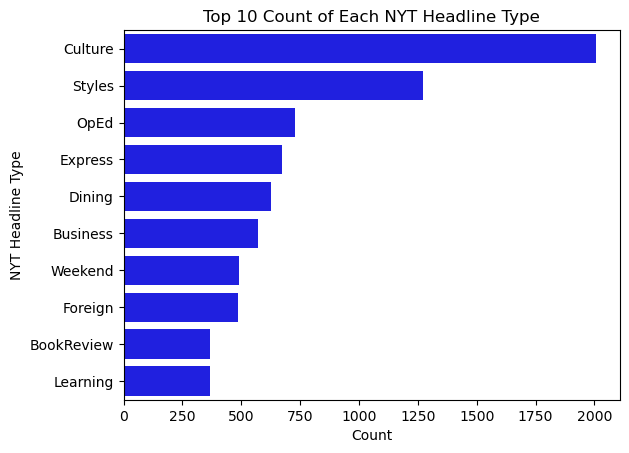

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

headline_type_counts = all_csv['headline_type'].value_counts()
top_10_headline_types = headline_type_counts.head(10)

sns.barplot(x=top_10_headline_types.values, y=top_10_headline_types.index, color='blue')

plt.xlabel('Count')
plt.ylabel('NYT Headline Type')
plt.title('Top 10 Count of Each NYT Headline Type')

plt.tick_params(axis='y', labelsize=10)
plt.show()

In [41]:
#"C:\Users\ashle\OneDrive\School\CS315_Project2\CS315Project2-main\allDetailsNYT.json"
json_file_path = r"C:\Users\ashle\OneDrive\School\CS315_Project2\CS315Project2-main\allDetailsNYT.json"

all_News = []  
with open(json_file_path, 'r') as file:
    data = json.load(file)
    for year in data:
        year_types = []
        for month in data[year]:
            article_type = data[year][month].get('article_type', '')
            if article_type:  
                year_types.append(article_type)
        all_News += year_types  # Concatenate year_types to all_News
concatenated_list = [item for sublist in all_News for item in sublist]
print(len(concatenated_list))

106125


['News' 'Quote' 'Correction' 'Op-Ed' 'Editorial' 'Obituary (Obit)'
 'Interactive Feature' 'Video' 'briefing' 'Letter' 'Review' 'Slideshow'
 'News Analysis' 'List' 'An Appraisal' 'Biography' 'Question']


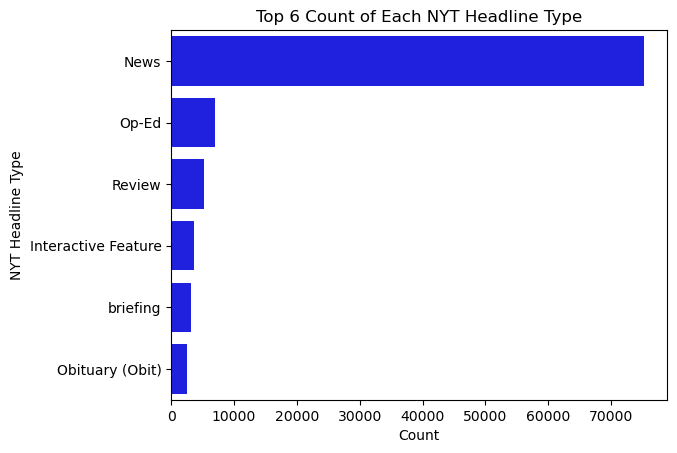

In [51]:
df = pd.DataFrame() 
df["all_types"] = concatenated_list

unique_values = all_csv['headline_type'].unique()
print(unique_values)

df['all_types'] = df['all_types'].replace('', pd.NA)
df.dropna(subset=['all_types'], inplace=True)
print(df["all_types"].unique())


headline_type_counts = df['all_types'].value_counts()
top_10_headline_types = headline_type_counts.head(6)

sns.barplot(x=top_10_headline_types.values, y=top_10_headline_types.index, color='blue')

plt.xlabel('Count')
plt.ylabel('NYT Headline Type')
plt.title('Top 6 Count of Each NYT Headline Type')

plt.tick_params(axis='y', labelsize=10)
plt.show()
